In [46]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [47]:
df = pd.read_csv('/Users/mpaliath/Desktop/apple-app/app_train.csv')
df_test = pd.read_csv('/Users/mpaliath/Desktop/apple-app/app_test.csv')

In [48]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,desc,rating
0,1169417102,ミリオン行進曲,196380672,USD,4.99,1,1,1.02,4+,Games,38,5,1,1,音楽事務所の社長に就任して歌手の卵を育てる、アイドル歌手育成シミュレーションゲーム ！\r\...,0
1,965748314,Pinata Hunter 3,38805504,USD,0.00,199,199,1.0.0,9+,Games,43,3,16,0,"Finally, it is back! The Pinata is here with t...",0
2,307764057,niconico,25808896,USD,0.00,182,0,6.52,17+,Entertainment,37,5,3,1,The Niconico app allows you to watch Niconico ...,0
3,1005783927,Frozen Frenzy Mania: Challenging Match 3 Games,296790016,USD,0.00,4104,143,2.1.1,4+,Games,37,5,1,1,Match ice cream treats to break through cookie...,1
4,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,1.9.13,9+,Games,38,0,5,1,The game requires iOS 6 compatible device.\r\n...,1


In [49]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 16 columns):
id                  5197 non-null int64
track_name          5197 non-null object
size_bytes          5197 non-null int64
currency            5197 non-null object
price               5197 non-null float64
rating_count_tot    5197 non-null int64
rating_count_ver    5197 non-null int64
ver                 5197 non-null object
cont_rating         5197 non-null object
prime_genre         5197 non-null object
sup_devices.num     5197 non-null int64
ipadSc_urls.num     5197 non-null int64
lang.num            5197 non-null int64
vpp_lic             5197 non-null int64
desc                5197 non-null object
rating              5197 non-null int64
dtypes: float64(1), int64(9), object(6)
memory usage: 649.8+ KB


id                  False
track_name          False
size_bytes          False
currency            False
price               False
rating_count_tot    False
rating_count_ver    False
ver                 False
cont_rating         False
prime_genre         False
sup_devices.num     False
ipadSc_urls.num     False
lang.num            False
vpp_lic             False
desc                False
rating              False
dtype: bool

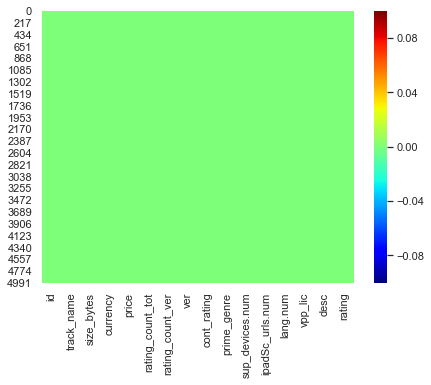

In [50]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='jet')
df.isnull().any()

In [51]:
df['prime_genre'].unique()

array(['Games', 'Entertainment', 'Finance', 'Education',
       'Health & Fitness', 'Navigation', 'Photo & Video', 'Business',
       'Travel', 'Shopping', 'Lifestyle', 'Food & Drink', 'Music', 'News',
       'Social Networking', 'Productivity', 'Medical', 'Reference',
       'Utilities', 'Weather', 'Sports', 'Book', 'Catalogs'], dtype=object)

In [52]:
# App values encoding
le = preprocessing.LabelEncoder()
df['track_name'] = le.fit_transform(df['track_name'])
# This encoder converts the values into numeric values

In [53]:
df.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,desc,rating
0,1169417102,4707,196380672,USD,4.99,1,1,1.02,4+,Games,38,5,1,1,音楽事務所の社長に就任して歌手の卵を育てる、アイドル歌手育成シミュレーションゲーム ！\r\...,0
1,965748314,2785,38805504,USD,0.00,199,199,1.0.0,9+,Games,43,3,16,0,"Finally, it is back! The Pinata is here with t...",0
2,307764057,4503,25808896,USD,0.00,182,0,6.52,17+,Entertainment,37,5,3,1,The Niconico app allows you to watch Niconico ...,0
3,1005783927,1451,296790016,USD,0.00,4104,143,2.1.1,4+,Games,37,5,1,1,Match ice cream treats to break through cookie...,1
4,350642635,2809,105379840,USD,0.99,426463,680,1.9.13,9+,Games,38,0,5,1,The game requires iOS 6 compatible device.\r\n...,1


In [54]:
# Genres features encoding
le = preprocessing.LabelEncoder()
df['prime_genre'] = le.fit_transform(df['prime_genre'])

In [55]:
df['currency'].unique()

array(['USD'], dtype=object)

In [56]:
df = df.drop(['currency'], axis=1)

In [72]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
df['cont_rating'] = le.fit_transform(df['cont_rating'])

In [78]:
# Version features encoding
le = preprocessing.LabelEncoder()
df['ver'] = le.fit_transform(df['ver'])

In [60]:
# App values encoding
le = preprocessing.LabelEncoder()
df['desc'] = le.fit_transform(df['desc'])

In [79]:
df

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,desc,rating
0,1169417102,4707,196380672,4.99,1,1,69,2,7,38,5,1,1,5155,0
1,965748314,2785,38805504,0.00,199,199,23,3,7,43,3,16,0,1635,0
2,307764057,4503,25808896,0.00,182,0,1154,1,4,37,5,3,1,3459,0
3,1005783927,1451,296790016,0.00,4104,143,523,2,7,37,5,1,1,2390,1
4,350642635,2809,105379840,0.99,426463,680,389,3,7,38,0,5,1,3578,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,1105304995,28,14638080,0.00,0,0,24,2,7,38,5,2,1,579,0
5193,1070689426,4980,129368064,0.99,166,154,265,3,7,40,5,1,1,4902,1
5194,1052726188,4398,1003165696,0.99,93,2,401,2,7,40,5,1,1,1706,1
5195,404095058,2992,9458688,1.99,28672,11,211,2,7,37,3,1,1,2935,1


In [67]:
list(df.columns)

['id',
 'track_name',
 'size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic',
 'desc',
 'rating']

In [80]:
# Split data into training and testing sets
features = list(df.columns)
X = df[features]
y = df['cont_rating']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [118]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors= 50)

In [119]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [120]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 0.27%'

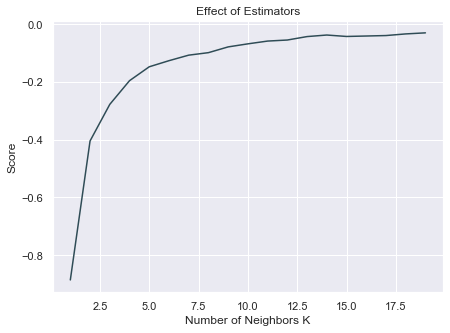

In [121]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)